<a href="https://colab.research.google.com/github/abhinavmangla/Horses-And-Human-Classifier/blob/master/Classifier_ImageGen_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-03-20 06:29:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   112MB/s    in 1.3s    

2020-03-20 06:29:51 (112 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse23-4.png', 'horse08-0.png', 'horse20-0.png', 'horse37-7.png', 'horse34-6.png', 'horse35-5.png', 'horse47-3.png', 'horse11-2.png', 'horse30-1.png', 'horse04-2.png']
['human16-03.png', 'human14-28.png', 'human06-15.png', 'human14-18.png', 'human09-16.png', 'human05-17.png', 'human03-30.png', 'human07-29.png', 'human01-06.png', 'human09-13.png']


In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

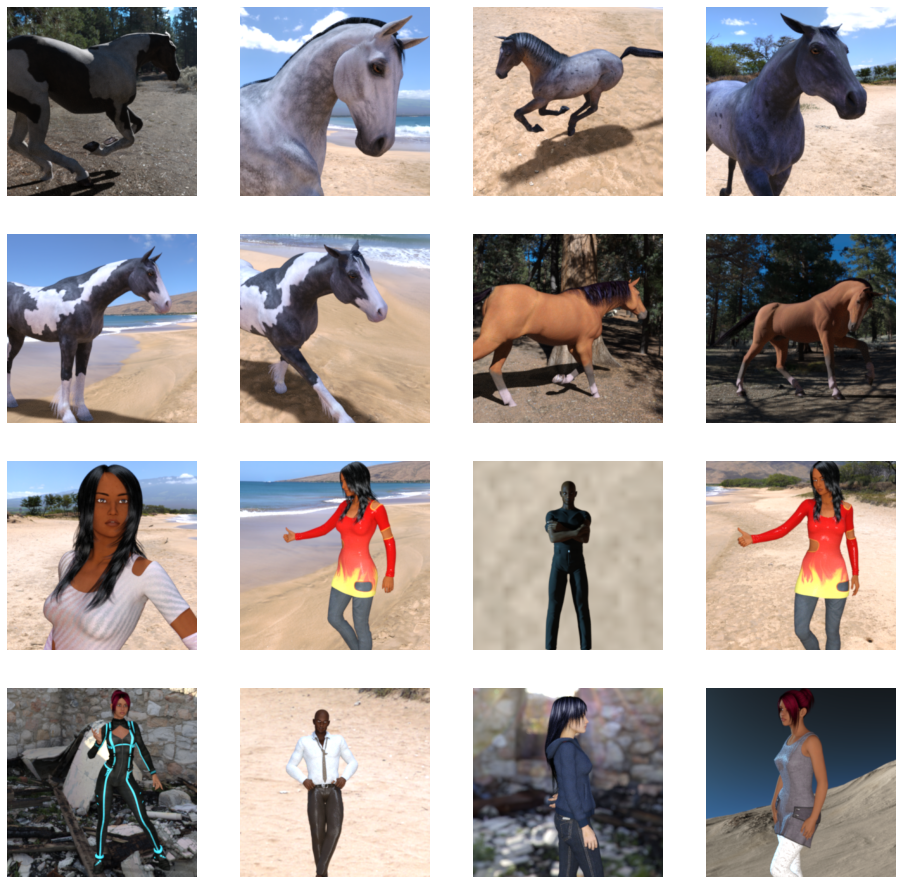

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
import tensorflow as tf
from tensorflow import keras

In [9]:
model = keras.models.Sequential([
        keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
        keras.layers.MaxPooling2D(2,2),

        keras.layers.Conv2D(32, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),

        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 8s 1s/step - loss: 0.7730 - acc: 0.5673
Epoch 2/15
8/8 [==============================] - 5s 589ms/step - loss: 0.6855 - acc: 0.6318
Epoch 3/15
8/8 [==============================] - 5s 671ms/step - loss: 0.4515 - acc: 0.7864
Epoch 4/15
8/8 [==============================] - 6s 766ms/step - loss: 0.4265 - acc: 0.8291
Epoch 5/15
8/8 [==============================] - 5s 675ms/step - loss: 0.3824 - acc: 0.8465
Epoch 6/15
8/8 [==============================] - 5s 581ms/step - loss: 0.3969 - acc: 0.9160
Epoch 7/15
8/8 [==============================] - 6s 759ms/step - loss: 0.2971 - acc: 0.8887
Epoch 8/15
8/8 [==============================] - 5s 669ms/step - loss: 0.1584 - acc: 0.9410
Epoch 9/15
8/8 [==============================] - 5s 667ms/step - loss: 0.1074 - acc: 0.9622
Epoch 10/15
8/8 [==============================] - 5s 675ms/step - loss: 0.0712 - acc: 0.9700
Epoch 11/15
8/8 [==============================] - 6s 758ms/step - loss:

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving beauty-1462986_1920.jpg to beauty-1462986_1920 (1).jpg
Saving human-613601_640.jpg to human-613601_640 (1).jpg
Saving mare-561221_1920.jpg to mare-561221_1920.jpg
Saving white-horse-1136093_1920.jpg to white-horse-1136093_1920.jpg
[1.]
beauty-1462986_1920.jpg is a human
[0.]
human-613601_640.jpg is a horse
[0.]
mare-561221_1920.jpg is a horse
[1.]
white-horse-1136093_1920.jpg is a human


In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)